# CP20_DanTrezise_InitialReport_EDA

#### NOTE:
    This notebook is the initial work in progress, exploring multiple datasets and multiple models.

    
    


# Libraries

In [1]:
# Import all necessary libraries
# python base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

# visualization tools
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# models
from sklearn import tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, make_pipeline

# model tools
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score, classification_report
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, StratifiedKFold

## df_intel: dogs intelligence dataset

In [2]:
# Dog df for intelligence
# https://www.kaggle.com/datasets/thedevastator/canine-intelligence-and-size?select=dog_intelligence.csv

# Load dataset and review shape

df_intel = pd.read_csv('../data/intelligence.csv')

### Data Overview

In [3]:
# Overview of columns

df_intel.columns, df_intel.shape

(Index(['index', 'Breed', 'Classification', 'Intelligence Scale', 'obey',
        'reps_lower', 'reps_upper', 'Unnamed: 7', 'Unnamed: 8'],
       dtype='object'),
 (136, 9))

In [4]:
df_intel.sample(5)

,index,Breed,Classification,Intelligence Scale,obey,reps_lower,reps_upper,Unnamed: 7,Unnamed: 8
103,103,Skye Terrier,Fair Working/Obedience Intelligence,5,0.30,41,80,NaN,NaN
124,124,Bullmastiff,Fair Working/Obedience Intelligence,5,0.30,41,80,NaN,NaN
5,5,Shetland Sheepdog,Brightest Dogs,1,0.95,1,4,NaN,NaN
9,9,Australian Cattle Dog,Brightest Dogs,1,0.95,1,4,NaN,NaN
75,75,Siberian Husky,Average Working/Obedience Intelligence,4,0.50,26,40,NaN,NaN


In [5]:
df_intel.describe()

,index,Intelligence Scale,obey,reps_lower,reps_upper,Unnamed: 7
count,136.000000,136.000000,136.000000,136.000000,136.000000,0.0
mean,67.500000,3.573529,0.566544,25.588235,41.507353,NaN
std,39.403892,1.347878,0.240913,20.496240,28.195875,NaN
min,0.000000,1.000000,0.100000,1.000000,4.000000,NaN
25%,33.750000,3.000000,0.500000,16.000000,25.000000,NaN
50%,67.500000,4.000000,0.500000,26.000000,40.000000,NaN
75%,101.250000,4.000000,0.700000,26.000000,40.000000,NaN
max,135.000000,6.000000,0.950000,81.000000,100.000000,NaN


### Data Clean Up

In [6]:
# drop bogus columns & confirm...

df_intel.drop("Unnamed: 7", axis=1,inplace=True)
df_intel.drop("Unnamed: 8", axis=1,inplace=True)
df_intel.columns

Index(['index', 'Breed', 'Classification', 'Intelligence Scale', 'obey',
       'reps_lower', 'reps_upper'],
      dtype='object')

In [7]:
# rename columns & confirm...

old_names = [
    'index',
    'Breed',
    'Classification',
    'Intelligence Scale',
    'obey',
    'reps_lower',
    'reps_upper'
] 

new_names = [
    'index',
    'Breed',
    'Classification',
    'Intelligence',
    'Obedience',
    'Reps low',
    'Reps high'
] 

df_intel.rename(columns=dict(zip(old_names, new_names)), inplace=True)
df_intel.columns

Index(['index', 'Breed', 'Classification', 'Intelligence', 'Obedience',
       'Reps low', 'Reps high'],
      dtype='object')

In [8]:
# Check for null data

df_intel.isnull().sum()

# looks great

index             0
Breed             0
Classification    0
Intelligence      0
Obedience         0
Reps low          0
Reps high         0
dtype: int64

In [9]:
# Check data types and counts

df_intel.info()

# Dtypes are great!
# Value Counts may be low compared to other datasets I'll be merging with later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           136 non-null    int64  
 1   Breed           136 non-null    object 
 2   Classification  136 non-null    object 
 3   Intelligence    136 non-null    int64  
 4   Obedience       136 non-null    float64
 5   Reps low        136 non-null    int64  
 6   Reps high       136 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 7.6+ KB


In [10]:
# look at df for any obvious remaining issues

df_intel.head()

# Looks ready to use, except maybe the "Classification" feature...

,index,Breed,Classification,Intelligence,Obedience,Reps low,Reps high
0,0,Border Collie,Brightest Dogs,1,0.95,1,4
1,1,Poodle,Brightest Dogs,1,0.95,1,4
2,2,German Shepherd,Brightest Dogs,1,0.95,1,4
3,3,Golden Retriever,Brightest Dogs,1,0.95,1,4
4,4,Doberman Pinscher,Brightest Dogs,1,0.95,1,4


In [11]:
# look at values for "Classification" feature to see if there if it can be translated into numeric encoding

df_intel['Classification'].unique()

# possibly an ordinal encoding may be useful. I will revisit later if my exploration suggests it may add value

array(['Brightest Dogs', 'Excellent Working Dogs',
       'Above Average Working Dogs',
       'Average Working/Obedience Intelligence',
       'Fair Working/Obedience Intelligence',
       'Lowest Degree of Working/Obedience Intelligence '], dtype=object)

### Visualizatons

<Axes: >

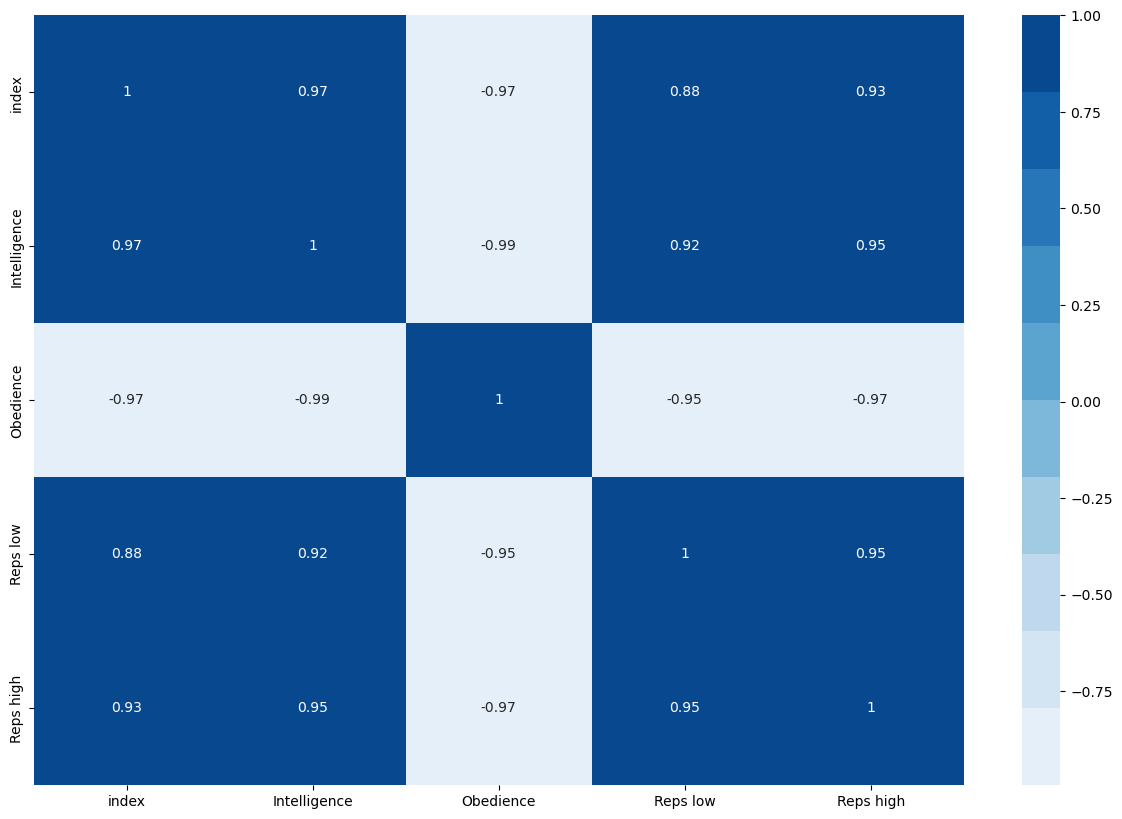

In [12]:
# A Quick Heatmap to get a visual of how features are correlating with each other

correlation = df_intel.corr(numeric_only=True)
colormap = sns.color_palette("Blues",10)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation, cmap=colormap, robust=True, annot=True)
# plt.savefig('../plots/df_intel_heatmap')

## df_akc: American Kennel Club Info dataset

In [13]:
# Dog df for AKC info
# https://www.kaggle.com/datasets/thedevastator/canine-intelligence-and-size?select=dog_intelligence.csv

# Load dataset and review shpae

df_akc = pd.read_csv('../data/AKC_breed_info.csv')

### Data Overview

In [14]:
# Overview of columns

df_akc.columns, df_akc.shape

(Index(['index', 'Breed', 'height_low_inches', 'height_high_inches',
        'weight_low_lbs', 'weight_high_lbs', 'Unnamed: 6', 'Unnamed: 7'],
       dtype='object'),
 (150, 8))

In [15]:
df_akc.sample(5)

,index,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,Unnamed: 6,Unnamed: 7
60,70,English Springer Spaniel,20.0,20.0,45,55,NaN,NaN
44,139,Chihuahua,6.0,9.0,2,5,NaN,NaN
72,39,Giant Schnauzer,25.0,28.0,70,75,NaN,NaN
32,27,Boxer,21.0,25.0,65,70,NaN,NaN
149,149,Yorkshire Terrier,8.0,8.0,3,7,NaN,NaN


In [16]:
df_akc.describe()

,index,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,Unnamed: 6
count,150.000000,150.000000,150.000000,150.000000,150.000000,0.0
mean,74.500000,17.933333,20.913333,42.946667,57.640000,NaN
std,43.445368,6.427621,7.623424,30.756630,41.294373,NaN
min,0.000000,6.000000,8.000000,2.000000,5.000000,NaN
25%,37.250000,13.000000,15.000000,18.000000,23.500000,NaN
50%,74.500000,18.000000,21.000000,40.000000,52.500000,NaN
75%,111.750000,22.750000,26.750000,60.000000,75.000000,NaN
max,149.000000,48.000000,66.000000,175.000000,190.000000,NaN


### Data Clean Up

In [17]:
# drop bogus columns & confirm...

df_akc.drop("Unnamed: 6", axis=1,inplace=True)
df_akc.drop("Unnamed: 7", axis=1,inplace=True)
df_akc.columns

Index(['index', 'Breed', 'height_low_inches', 'height_high_inches',
       'weight_low_lbs', 'weight_high_lbs'],
      dtype='object')

In [18]:
# rename columns & confirm...

old_names = [
    'index',
    'Breed',
    'height_low_inches',
    'height_high_inches',
    'weight_low_lbs',
    'weight_high_lbs'
] 

new_names = [
    'index', 
    'Breed', 
    'Height low', 
    'Height high',
    'Weight low',
    'Weight high'
] 

df_akc.rename(columns=dict(zip(old_names, new_names)), inplace=True)
df_akc.columns

Index(['index', 'Breed', 'Height low', 'Height high', 'Weight low',
       'Weight high'],
      dtype='object')

In [19]:
# check for null values

df_akc.isnull().sum()

# looks great!

index          0
Breed          0
Height low     0
Height high    0
Weight low     0
Weight high    0
dtype: int64

In [20]:
# Check data types and counts

df_akc.info()

# Dtypes are great!
# Value Counts may be low compared to other datasets I'll be merging with later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        150 non-null    int64  
 1   Breed        150 non-null    object 
 2   Height low   150 non-null    float64
 3   Height high  150 non-null    float64
 4   Weight low   150 non-null    int64  
 5   Weight high  150 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 7.2+ KB


In [21]:
# look at df for any obvious remaining issues

df_akc.head()

# Looks ready to use

,index,Breed,Height low,Height high,Weight low,Weight high
0,138,Affenpinscher,9.0,12.0,8,12
1,17,Afghan Hound,25.0,27.0,50,60
2,53,Airdale Terrier,22.0,24.0,45,45
3,0,Akita,26.0,28.0,80,120
4,18,Alaskan Malamute,23.0,25.0,75,85


### Visualizatons

<Axes: >

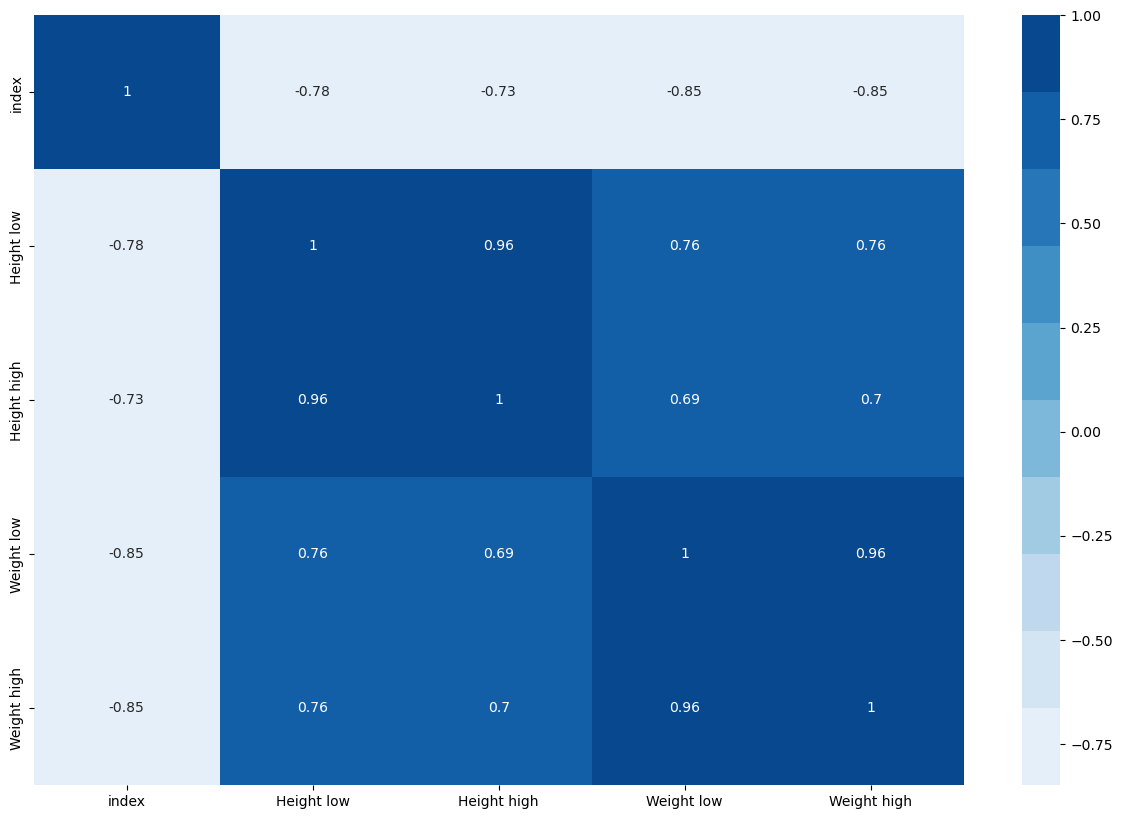

In [22]:
# A Quick Heatmap to get a visual of how features are correlating with each other

correlation = df_akc.corr(numeric_only=True)
colormap = sns.color_palette("Blues",10)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation, cmap=colormap, robust=True, annot=True)
# plt.savefig('../plots/df_akc_heatmap')

## df_world: Dogs from Around the World dataset

In [23]:
# Dog df for Breeds around the World

# Load dataset and review shape

df_world = pd.read_csv('../data/breads_around_the_world.csv')

### Data Overview

In [24]:
# Overview of columns

df_world.columns, df_world.shape

(Index(['Name', 'Origin', 'Type', 'Unique Feature', 'Friendly Rating (1-10)',
        'Life Span', 'Size', 'Size.1', 'Grooming Needs',
        'Exercise Requirements (hrs/day)', 'Good with Children',
        'Intelligence Rating (1-10)', 'Shedding Level', 'Health Issues Risk',
        'Training Difficulty (1-10)'],
       dtype='object'),
 (159, 15))

In [25]:
df_world.sample(5)

,Name,Origin,Type,Unique Feature,Friendly Rating (1-10),Life Span,Size,Size.1,Grooming Needs,Exercise Requirements (hrs/day),Good with Children,Intelligence Rating (1-10),Shedding Level,Health Issues Risk,Training Difficulty (1-10)
30,Cairn Terrier,Scotland,Terrier,Weather-resistant coat,8,14,Small,2,3,1.5,1.0,7,3,4,6
13,Beagle,England,Hound,Excellent sense of smell,9,13,Small-Medium,3,4,2.0,1.0,7,3,3,7
130,Shetland Sheepdog,Scotland,Herding,Miniature Collie,9,12,Medium,4,2,2.0,1.0,8,2,3,5
37,Chinese Crested,China,Toy,Hairless variety,7,14,Small,2,2,1.0,1.0,8,4,4,6
115,Portuguese Podengo,Portugal,Hound,Perky ears,7,12,Medium,4,3,2.0,1.0,8,3,4,8


In [26]:
df_world.describe()

,Friendly Rating (1-10),Life Span,Size.1,Grooming Needs,Exercise Requirements (hrs/day),Good with Children,Intelligence Rating (1-10),Shedding Level,Health Issues Risk,Training Difficulty (1-10)
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,7.484277,12.050314,3.704403,2.704403,1.842767,0.849057,7.113208,3.012579,3.220126,6.572327
std,0.973415,1.574314,1.295335,0.945030,0.450521,0.306856,0.899938,0.655912,0.699437,0.964294
min,5.000000,7.000000,1.000000,1.000000,1.000000,0.000000,4.000000,1.000000,2.000000,4.000000
25%,7.000000,11.000000,2.000000,2.000000,1.500000,1.000000,7.000000,3.000000,3.000000,6.000000
50%,7.000000,12.000000,4.000000,3.000000,2.000000,1.000000,7.000000,3.000000,3.000000,7.000000
75%,8.000000,13.000000,5.000000,3.000000,2.000000,1.000000,8.000000,3.000000,4.000000,7.000000
max,10.000000,16.000000,6.000000,4.000000,3.000000,1.000000,10.000000,4.000000,4.000000,9.000000


### Data Clean Up

In [27]:
# Rename Columns & confirm...

# drop "Size" to replace with "Size.1" in the remaming below - more useful data
df_world.drop("Size", axis=1,inplace=True)

old_names = [
    'Name',
    'Origin',
    'Type',
    'Unique Feature',
    'Friendly Rating (1-10)',
    'Life Span',
    'Size.1',
    'Grooming Needs',
    'Exercise Requirements (hrs/day)',
    'Good with Children',
    'Intelligence Rating (1-10)',
    'Shedding Level',
    'Health Issues Risk',
    'Training Difficulty (1-10)'
] 

new_names = [
    'Breed',
    'Origin',
    'Type',
    'Unique Feature',
    'Friendliness',
    'Lifespan',
    'Size',
    'Grooming',
    'Exercise',
    'Good with Children',
    'Intelligence',
    'Shedding',
    'Health Issues',
    'Training'
] 

df_world.rename(columns=dict(zip(old_names, new_names)), inplace=True)
df_world.columns

Index(['Breed', 'Origin', 'Type', 'Unique Feature', 'Friendliness', 'Lifespan',
       'Size', 'Grooming', 'Exercise', 'Good with Children', 'Intelligence',
       'Shedding', 'Health Issues', 'Training'],
      dtype='object')

In [28]:
# Check for null data

df_world.isnull().sum()

# looks great!

Breed                 0
Origin                0
Type                  0
Unique Feature        0
Friendliness          0
Lifespan              0
Size                  0
Grooming              0
Exercise              0
Good with Children    0
Intelligence          0
Shedding              0
Health Issues         0
Training              0
dtype: int64

In [29]:
# Check data types and counts

df_world.info()

# Dtypes are great!
# Value Counts may be low compared to other datasets I'll be merging with later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Breed               159 non-null    object 
 1   Origin              159 non-null    object 
 2   Type                159 non-null    object 
 3   Unique Feature      159 non-null    object 
 4   Friendliness        159 non-null    int64  
 5   Lifespan            159 non-null    int64  
 6   Size                159 non-null    int64  
 7   Grooming            159 non-null    int64  
 8   Exercise            159 non-null    float64
 9   Good with Children  159 non-null    float64
 10  Intelligence        159 non-null    int64  
 11  Shedding            159 non-null    int64  
 12  Health Issues       159 non-null    int64  
 13  Training            159 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 17.5+ KB


In [30]:
# look at df for any obvious remaining issues

df_world.head()

# Looks ready to use

,Breed,Origin,Type,Unique Feature,Friendliness,Lifespan,Size,Grooming,Exercise,Good with Children,Intelligence,Shedding,Health Issues,Training
0,Affenpinscher,Germany,Toy,Monkey-like face,7,14,2,2,1.5,1.0,8,3,4,6
1,Afghan Hound,Afghanistan,Hound,Long silky coat,5,13,5,1,2.0,0.0,4,2,3,8
2,Airedale Terrier,England,Terrier,Largest of terriers,8,12,4,2,2.0,1.0,7,3,4,6
3,Akita,Japan,Working,Strong loyalty,6,11,5,3,2.0,0.5,7,2,2,9
4,Alaskan Malamute,Alaska USA,Working,Strong pulling ability,7,11,5,2,3.0,1.0,6,1,3,8


### Visualizatons

<Axes: >

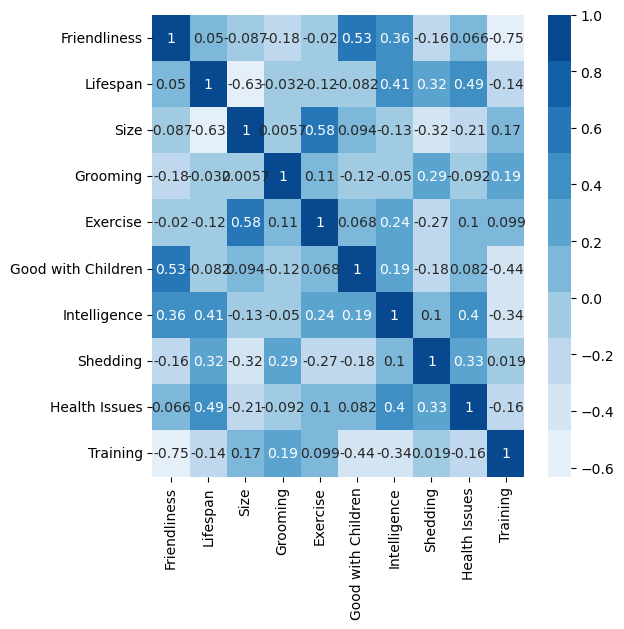

In [31]:
# A Quick Heatmap to get a visual of how features are correlating with each other

correlation = df_world.corr(numeric_only=True)
colormap = sns.color_palette("Blues",10)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(correlation, cmap=colormap, robust=True, annot=True)
# plt.savefig('../plots/df_world_heatmap.png')

## df_hundred: One Hundred Dogs dataset

In [32]:
# Dog df for One Hundred Dogs
# https://www.dogbreedslist.info/all-dog-breeds/page-2.html

# Load dataset and review shape

df_hundred = pd.read_csv('../data/hundred_dogs.csv')

### Data Overview

In [33]:
# Overview of columns

df_hundred.columns, df_hundred.shape

(Index(['Breed', 'Lifespan low', 'Lifespan high', 'Popularity',
        'Hypoallergenic', 'Intelligence', 'Temperament', 'Temperament2',
        'Temperament3', 'Temperament4', 'Price low', 'Price high',
        'https://www.dogbreedslist.info/all-dog-breeds/page-2.html'],
       dtype='object'),
 (100, 13))

In [34]:
df_hundred.sample(5)

,Breed,Lifespan low,Lifespan high,Popularity,Hypoallergenic,Intelligence,Temperament,Temperament2,Temperament3,Temperament4,Price low,Price high,https://www.dogbreedslist.info/all-dog-breeds/page-2.html
94,Vizsla,10.0,14.0,33,0,25,Intelligent,Loyal,Affectionate,Energetic,1000,1000,NaN
41,Dogue de Bordeaux,10.0,12.0,78,0,-,Devoted,Courageous,Companionable,Vigilant,1800,2500,NaN
60,Keeshond,12.0,14.0,90,0,16,Intelligent,Quick,Agile,Sturdy,1500,2500,NaN
62,Lagotto Romag0lo,14.0,16.0,76,1,-,Loving,Loyal,Companionable,Trainable,3000,2000,NaN
32,Chihuahua,14.0,18.0,34,0,67,Devoted,Quick,Courageous,Lively,800,3000,NaN


In [35]:
df_hundred.describe()

,Lifespan low,Lifespan high,Popularity,Price low,Price high,https://www.dogbreedslist.info/all-dog-breeds/page-2.html
count,99.000000,99.000000,100.000000,100.000000,100.000000,0.0
mean,11.202020,13.808081,50.480000,1206.000000,2166.000000,NaN
std,1.684138,1.849858,28.974207,431.773416,696.052361,NaN
min,6.000000,10.000000,1.000000,400.000000,1000.000000,NaN
25%,10.000000,12.000000,25.750000,800.000000,1575.000000,NaN
50%,12.000000,14.000000,50.500000,1000.000000,2000.000000,NaN
75%,12.000000,15.000000,75.250000,1500.000000,2500.000000,NaN
max,15.000000,18.000000,100.000000,3000.000000,5000.000000,NaN


### Data Clean Up

In [36]:
# drop html column entry & confirm...
df_hundred.drop("https://www.dogbreedslist.info/all-dog-breeds/page-2.html", axis=1,inplace=True)
df_hundred.columns

Index(['Breed', 'Lifespan low', 'Lifespan high', 'Popularity',
       'Hypoallergenic', 'Intelligence', 'Temperament', 'Temperament2',
       'Temperament3', 'Temperament4', 'Price low', 'Price high'],
      dtype='object')

In [37]:
# Rename columns & confirm...

old_names = [
    'Breed',
    'Lifespan low',
    'Lifespan high',
    'Popularity',
    'Hypoallergenic',
    'Intelligence',
    'Temperament',
    'Temperament2',
    'Temperament3',
    'Temperament4',
    'Price low',
    'Price high'
] 
new_names = [
    'Breed',
    'Lifespan low',
    'Lifespan high',
    'Popularity',
    'Hypoallergenic',
    'Intelligence',
    'Temperament 01',
    'Temperament 02',
    'Temperament 03',
    'Temperament 04',
    'Price low',
    'Price high'
] 

df_hundred.rename(columns=dict(zip(old_names, new_names)), inplace=True)
df_hundred.columns

Index(['Breed', 'Lifespan low', 'Lifespan high', 'Popularity',
       'Hypoallergenic', 'Intelligence', 'Temperament 01', 'Temperament 02',
       'Temperament 03', 'Temperament 04', 'Price low', 'Price high'],
      dtype='object')

In [38]:
df_hundred.drop("Popularity", axis=1,inplace=True)
df_hundred.columns

Index(['Breed', 'Lifespan low', 'Lifespan high', 'Hypoallergenic',
       'Intelligence', 'Temperament 01', 'Temperament 02', 'Temperament 03',
       'Temperament 04', 'Price low', 'Price high'],
      dtype='object')

In [39]:
# Check data types and counts

df_hundred.info()

# Some datatypes need to be converted from object to int or float
# Value Counts seem similar to other datasets - close to 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Breed           100 non-null    object 
 1   Lifespan low    99 non-null     float64
 2   Lifespan high   99 non-null     float64
 3   Hypoallergenic  100 non-null    object 
 4   Intelligence    100 non-null    object 
 5   Temperament 01  100 non-null    object 
 6   Temperament 02  100 non-null    object 
 7   Temperament 03  100 non-null    object 
 8   Temperament 04  98 non-null     object 
 9   Price low       100 non-null    int64  
 10  Price high      100 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 8.7+ KB


In [40]:
# look at df for any obvious issues

df_hundred.head()

# not sure if the Temperament columns will be of any use, but may revisit

,Breed,Lifespan low,Lifespan high,Hypoallergenic,Intelligence,Temperament 01,Temperament 02,Temperament 03,Temperament 04,Price low,Price high
0,Airedale Terrier,10.0,13.0,1,29,Intelligent,Outgoing,Courageous,Confident,800,2000
1,Akita,10.0,14.0,0,54,Dignified,Friendly,Courageous,Docile,1000,2000
2,Alaskan Malamute,12.0,15.0,0,50,Dignified,Playful,Friendly,Devoted,1200,2500
3,American Cocker Spaniel,12.0,15.0,0,20,Outgoing,Sociable,Even Tempered,Trusting,1000,2000
4,American Staffordshire Terrier,12.0,14.0,0,34,Friendly,Devoted,Courageous,Loyal,1500,2500


In [41]:
# Check for null data

df_hundred.isnull().sum()

Breed             0
Lifespan low      1
Lifespan high     1
Hypoallergenic    0
Intelligence      0
Temperament 01    0
Temperament 02    0
Temperament 03    0
Temperament 04    2
Price low         0
Price high        0
dtype: int64

In [42]:
# drop "Temperament 04" column - not crucial data
# drop remaining rows with null values

df_hundred.drop("Temperament 04", axis=1,inplace=True)
df_hundred.dropna(axis=0,inplace=True)

df_hundred.isnull().sum()

# Confirm nulls are gone - looks great!

Breed             0
Lifespan low      0
Lifespan high     0
Hypoallergenic    0
Intelligence      0
Temperament 01    0
Temperament 02    0
Temperament 03    0
Price low         0
Price high        0
dtype: int64

In [43]:
# confirm new shape

df_hundred.shape

(99, 10)

In [44]:
# look at df for any obvious remaining issues

df_hundred.head()

# Looks ready to use other than unsolved datatypes

,Breed,Lifespan low,Lifespan high,Hypoallergenic,Intelligence,Temperament 01,Temperament 02,Temperament 03,Price low,Price high
0,Airedale Terrier,10.0,13.0,1,29,Intelligent,Outgoing,Courageous,800,2000
1,Akita,10.0,14.0,0,54,Dignified,Friendly,Courageous,1000,2000
2,Alaskan Malamute,12.0,15.0,0,50,Dignified,Playful,Friendly,1200,2500
3,American Cocker Spaniel,12.0,15.0,0,20,Outgoing,Sociable,Even Tempered,1000,2000
4,American Staffordshire Terrier,12.0,14.0,0,34,Friendly,Devoted,Courageous,1500,2500


In [45]:
df_hundred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Breed           99 non-null     object 
 1   Lifespan low    99 non-null     float64
 2   Lifespan high   99 non-null     float64
 3   Hypoallergenic  99 non-null     object 
 4   Intelligence    99 non-null     object 
 5   Temperament 01  99 non-null     object 
 6   Temperament 02  99 non-null     object 
 7   Temperament 03  99 non-null     object 
 8   Price low       99 non-null     int64  
 9   Price high      99 non-null     int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 8.5+ KB


In [46]:
# df_hundred['Price high'].unique

In [47]:
# Convert datatypes from object to int & confirm...

df_hundred[['Hypoallergenic', 'Intelligence', 'Price low', 'Price high']] = df_hundred[['Hypoallergenic', 'Intelligence', 'Price low', 'Price high']].apply(pd.to_numeric, errors='coerce')

df_hundred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Breed           99 non-null     object 
 1   Lifespan low    99 non-null     float64
 2   Lifespan high   99 non-null     float64
 3   Hypoallergenic  98 non-null     float64
 4   Intelligence    87 non-null     float64
 5   Temperament 01  99 non-null     object 
 6   Temperament 02  99 non-null     object 
 7   Temperament 03  99 non-null     object 
 8   Price low       99 non-null     int64  
 9   Price high      99 non-null     int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 8.5+ KB


In [48]:
df_hundred.shape

(99, 10)

In [49]:
df_hundred.head()

,Breed,Lifespan low,Lifespan high,Hypoallergenic,Intelligence,Temperament 01,Temperament 02,Temperament 03,Price low,Price high
0,Airedale Terrier,10.0,13.0,1.0,29.0,Intelligent,Outgoing,Courageous,800,2000
1,Akita,10.0,14.0,0.0,54.0,Dignified,Friendly,Courageous,1000,2000
2,Alaskan Malamute,12.0,15.0,0.0,50.0,Dignified,Playful,Friendly,1200,2500
3,American Cocker Spaniel,12.0,15.0,0.0,20.0,Outgoing,Sociable,Even Tempered,1000,2000
4,American Staffordshire Terrier,12.0,14.0,0.0,34.0,Friendly,Devoted,Courageous,1500,2500


### Visualizatons

<Axes: >

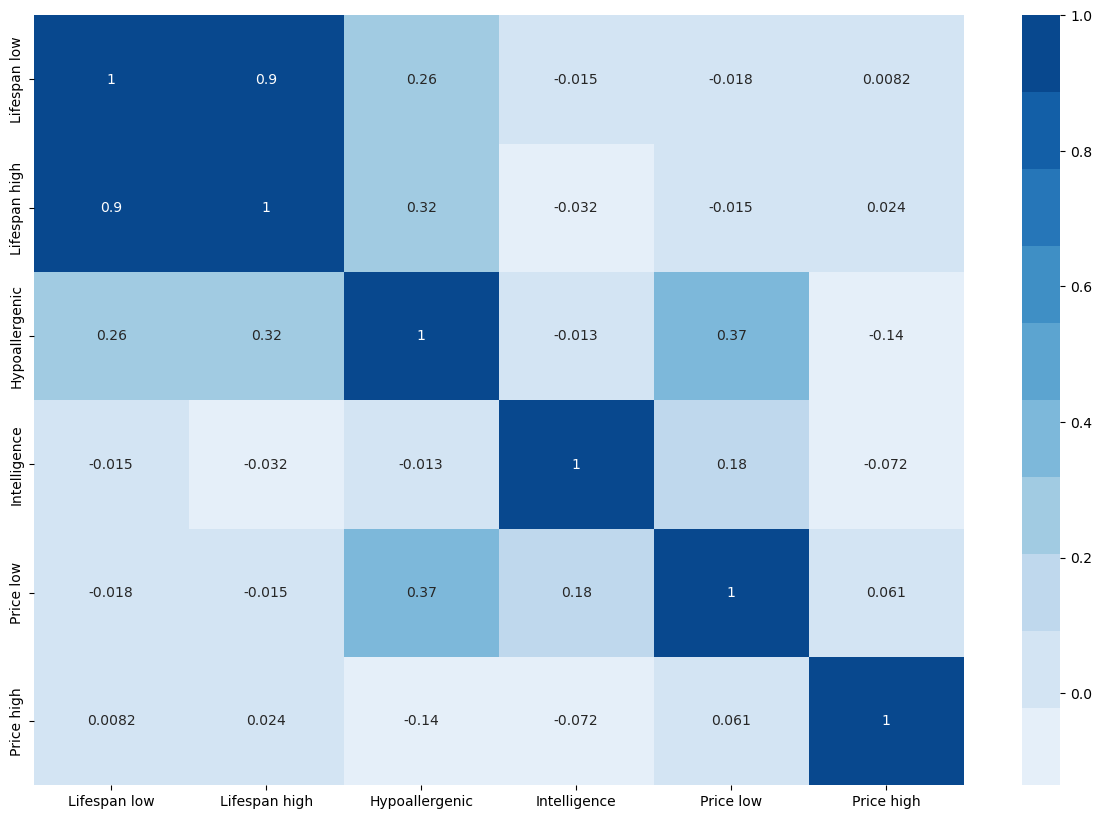

In [50]:
# A Quick Heatmap to get a visual of how features are correlating with each other

correlation = df_hundred.corr(numeric_only=True)
colormap = sns.color_palette("Blues",10)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation, cmap=colormap, robust=True, annot=True)
# plt.savefig('../plots/df_hundred_heatmap.png')

## df_bis: Best in Show dataset

In [51]:
# Dog df for Best in Show
# The loaded data below is a reduced version of ../data/best_in_show.csv
# It was more efficient to reorganize, label and reduce the dataset in excel as a starting point

# Load dataset and review shape

df_bis = pd.read_csv('../data/best_in_show_reduced.csv')

### Data Overview

In [52]:
# Overview of columns

df_bis.columns, df_bis.shape

(Index(['Popularity ', 'Breed', 'Group', 'Size', 'Price Bracket', 'Price low',
        'Price high', 'Lifetime Cost', 'Lifespan', 'Genetic Ailments',
        'Grooming Score', 'Intelligence Category', 'Trainability',
        'Training Repetitions', 'Odedience', 'Children Score'],
       dtype='object'),
 (172, 16))

In [53]:
df_bis.sample(5)

,Popularity,Breed,Group,Size,Price Bracket,Price low,Price high,Lifetime Cost,Lifespan,Genetic Ailments,Grooming Score,Intelligence Category,Trainability,Training Repetitions,Odedience,Children Score
60,13,Doberman Pinscher,working,large,mid-price,300,1200,"18,397",10.33,4.0,2,Brightest,5.0,less than 5,95,2
82,82,Greater Swiss Mountain Dog,working,large,high-end,900,2500,NaN,6.8,1.0,-,NaN,NaN,NaN,NaN,-
40,6,Bulldog,non-sporting,medium,high-end,1500,5500,"13,479",6.29,5.0,2,Lowest,78.0,80 to 100,<25,2
106,28,Mastiff,working,large,mid-price,150,1200,"13,581",6.5,2.0,2,Lowest,72.0,80 to 100,<25,1
84,172,Harrier,hound,medium,NaN,NaN,NaN,NaN,NaN,0.0,-,NaN,NaN,NaN,NaN,-


In [54]:
df_bis.describe()

,Popularity,Genetic Ailments,Trainability
count,172.000000,148.000000,132.000000
mean,87.122093,1.216216,40.924242
std,50.205335,1.549810,19.603560
min,1.000000,0.000000,1.000000
25%,43.750000,0.000000,27.000000
50%,87.500000,1.000000,42.000000
75%,130.250000,2.000000,54.250000
max,173.000000,9.000000,80.000000


### Data Clean Up

In [55]:
df_bis.isnull().sum()

Popularity                0
Breed                     0
Group                     0
Size                      0
Price Bracket            26
Price low                26
Price high               26
Lifetime Cost            81
Lifespan                 36
Genetic Ailments         24
Grooming Score            0
Intelligence Category    40
Trainability             40
Training Repetitions     40
Odedience                40
Children Score            0
dtype: int64

In [56]:
# Dropping columns with lots of null values or limited impact on the model

df_bis.drop("Lifetime Cost", axis=1,inplace=True)
df_bis.drop("Price low", axis=1,inplace=True)
df_bis.drop("Price high", axis=1,inplace=True)
df_bis.drop("Trainability", axis=1,inplace=True)
df_bis.drop("Training Repetitions", axis=1,inplace=True)
df_bis.drop("Odedience", axis=1,inplace=True)
df_bis.drop("Grooming Score", axis=1,inplace=True)
df_bis.drop("Children Score", axis=1,inplace=True)

df_bis.dropna(axis=0, inplace=True)
df_bis.isnull().sum()

Popularity               0
Breed                    0
Group                    0
Size                     0
Price Bracket            0
Lifespan                 0
Genetic Ailments         0
Intelligence Category    0
dtype: int64

In [57]:
df_bis.shape

(103, 8)

In [58]:
# Overview of df

df_bis.head()

,Popularity,Breed,Group,Size,Price Bracket,Lifespan,Genetic Ailments,Intelligence Category
0,139,Affenpinscher,toy,small,budget,11.42,0.0,Above average
1,88,Afghan Hound,hound,large,mid-price,11.92,0.0,Lowest
2,55,Airedale Terrier,terrier,medium,mid-price,11.45,1.0,Above average
3,47,Akita,working,large,mid-price,10.16,1.0,Average
4,58,Alaskan Malamute,working,large,mid-price,10.67,2.0,Average


In [59]:
# df_bis['Genetic Ailments'].unique()

In [60]:
# Converting strings to useful number rankings
# I had to cast objects to str before using .str.replace

df_bis['Size'] = df_bis['Size']\
    .astype(str).str.replace('small', '0')\
    .astype(str).str.replace('medium', '.5')\
    .astype(str).str.replace('large', '1')

df_bis['Price Bracket'] = df_bis['Price Bracket']\
    .astype(str).str.replace('budget', '0')\
    .astype(str).str.replace('mid-price', '.5')\
    .astype(str).str.replace('high-end', '1')

df_bis['Intelligence Category'] = df_bis['Intelligence Category']\
    .astype(str).str.replace('Lowest', '0')\
    .astype(str).str.replace('Fair', '.25')\
    .astype(str).str.replace('Average', '.5')\
    .astype(str).str.replace('Above average', '.65')\
    .astype(str).str.replace('Excellent', '.85')\
    .astype(str).str.replace('Brightest', '1')

# confirm name changes
df_bis.head()

,Popularity,Breed,Group,Size,Price Bracket,Lifespan,Genetic Ailments,Intelligence Category
0,139,Affenpinscher,toy,0,0,11.42,0.0,.65
1,88,Afghan Hound,hound,1,.5,11.92,0.0,0
2,55,Airedale Terrier,terrier,.5,.5,11.45,1.0,.65
3,47,Akita,working,1,.5,10.16,1.0,.5
4,58,Alaskan Malamute,working,1,.5,10.67,2.0,.5


In [61]:
# Identify which datatypes need to be fixed
df_bis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 0 to 171
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Popularity             103 non-null    int64  
 1   Breed                  103 non-null    object 
 2   Group                  103 non-null    object 
 3   Size                   103 non-null    object 
 4   Price Bracket          103 non-null    object 
 5   Lifespan               103 non-null    object 
 6   Genetic Ailments       103 non-null    float64
 7   Intelligence Category  103 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.2+ KB


In [62]:
# Converting datatypes & confirm...

df_bis[['Size', 'Price Bracket', 'Lifespan', 'Intelligence Category']] = df_bis[['Size', 'Price Bracket', 'Lifespan', 'Intelligence Category']].astype(float)
df_bis.info()

# Looks great!

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 0 to 171
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Popularity             103 non-null    int64  
 1   Breed                  103 non-null    object 
 2   Group                  103 non-null    object 
 3   Size                   103 non-null    float64
 4   Price Bracket          103 non-null    float64
 5   Lifespan               103 non-null    float64
 6   Genetic Ailments       103 non-null    float64
 7   Intelligence Category  103 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 7.2+ KB


In [63]:
df_bis.isnull().sum()

Popularity               0
Breed                    0
Group                    0
Size                     0
Price Bracket            0
Lifespan                 0
Genetic Ailments         0
Intelligence Category    0
dtype: int64

In [64]:
# look at df for any obvious remaining issues

df_bis.head()

# Looks ready to use

,Popularity,Breed,Group,Size,Price Bracket,Lifespan,Genetic Ailments,Intelligence Category
0,139,Affenpinscher,toy,0.0,0.0,11.42,0.0,0.65
1,88,Afghan Hound,hound,1.0,0.5,11.92,0.0,0.00
2,55,Airedale Terrier,terrier,0.5,0.5,11.45,1.0,0.65
3,47,Akita,working,1.0,0.5,10.16,1.0,0.50
4,58,Alaskan Malamute,working,1.0,0.5,10.67,2.0,0.50


In [65]:
# Renaming "Popularity" to remove a space at the end
df_bis.rename(columns={'Popularity ' : 'Popularity'}, inplace=True)

### Visualizatons

<Axes: >

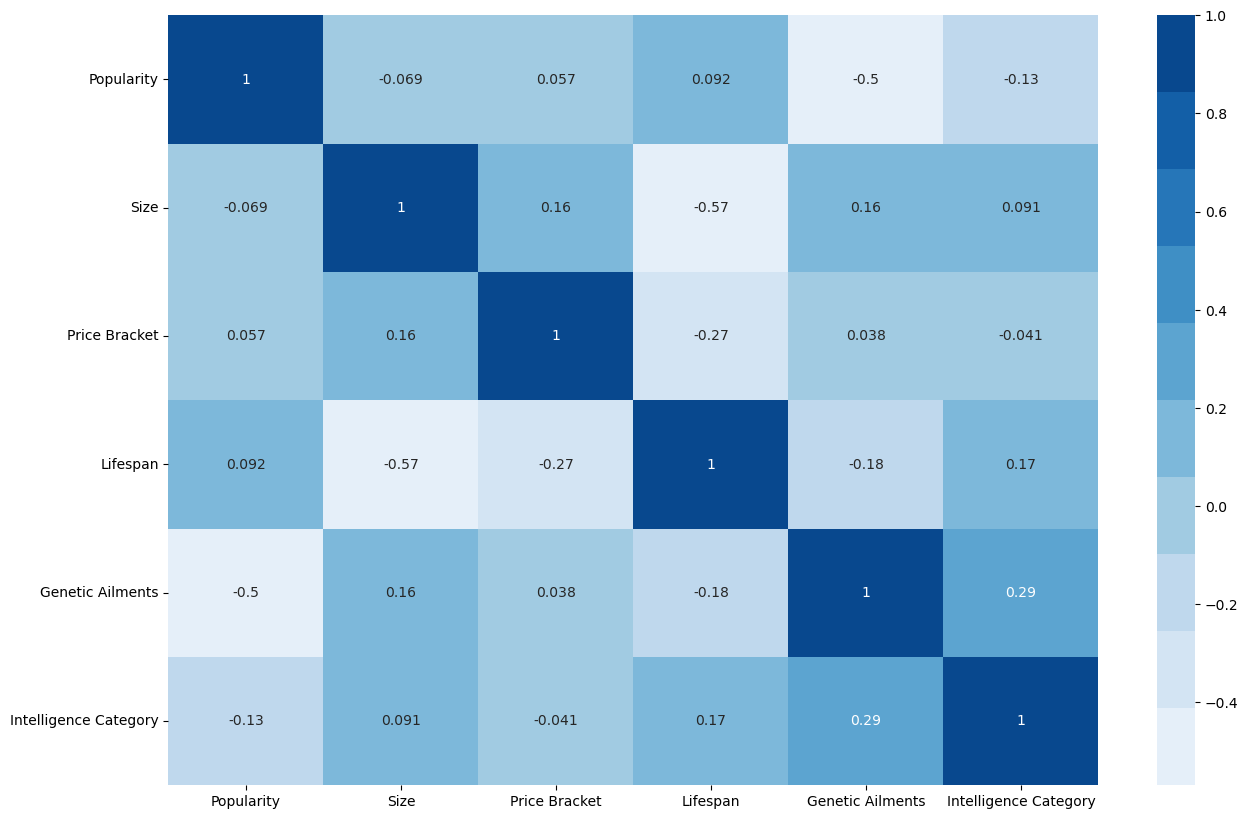

In [66]:
# A Quick Heatmap to get a visual of how features are correlating with each other

correlation = df_bis.corr(numeric_only=True)
colormap = sns.color_palette("Blues",10)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation, cmap=colormap, robust=True, annot=True)
# plt.savefig('../plots/df_bis_heatmap.png')

In [67]:
df_bis.shape

(103, 8)

# MERGE ALL DATASETS

### dogs_df  =  df_intel, df_world, df_hundred, df_bis

In [68]:
data_frames = [df_intel, df_world, df_hundred, df_bis]

dogs1_df = df_akc.merge(df_intel, how='outer', on=['Breed'])
dogs2_df = dogs1_df.merge(df_world, how='outer', on=['Breed'])
dogs3_df = dogs2_df.merge(df_hundred, how='outer', on=['Breed'])
dogs_df = dogs3_df.merge(df_bis, how='outer', on=['Breed'])

# dogs3_df.head(15)
dogs_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index_x                150 non-null    float64
 1   Breed                  232 non-null    object 
 2   Height low             150 non-null    float64
 3   Height high            150 non-null    float64
 4   Weight low             150 non-null    float64
 5   Weight high            150 non-null    float64
 6   index_y                136 non-null    float64
 7   Classification         136 non-null    object 
 8   Intelligence_x         136 non-null    float64
 9   Obedience              136 non-null    float64
 10  Reps low               136 non-null    float64
 11  Reps high              136 non-null    float64
 12  Origin                 159 non-null    object 
 13  Type                   159 non-null    object 
 14  Unique Feature         159 non-null    object 
 15  Friend

In [69]:
# dogs_df.isnull().sum()

In [70]:
dogs_df.shape

(232, 41)

### Prepare merged dataset for modeling

In [71]:
dogs_df = dogs_df[dogs_df['Intelligence_x'].notna()]
dogs_df = dogs_df[dogs_df['Popularity'].notna()]
dogs_df = dogs_df[dogs_df['Friendliness'].notna()]

In [72]:
dogs_df.isnull().sum()

index_x                  14
Breed                     0
Height low               14
Height high              14
Weight low               14
Weight high              14
index_y                   0
Classification            0
Intelligence_x            0
Obedience                 0
Reps low                  0
Reps high                 0
Origin                    0
Type                      0
Unique Feature            0
Friendliness              0
Lifespan_x                0
Size_x                    0
Grooming                  0
Exercise                  0
Good with Children        0
Intelligence_y            0
Shedding                  0
Health Issues             0
Training                  0
Lifespan low             22
Lifespan high            22
Hypoallergenic           22
Intelligence             22
Temperament 01           22
Temperament 02           22
Temperament 03           22
Price low                22
Price high               22
Popularity                0
Group               

In [73]:
reduced_features = ['Intelligence_x', 'Obedience', 'Friendliness', 'Lifespan_x', 'Size_x', 'Grooming',
       'Exercise', 'Good with Children', 'Intelligence_y', 'Shedding',
       'Health Issues', 'Training', 'Popularity', 'Size_y', 'Price Bracket', 'Lifespan_y', 'Genetic Ailments', 'Intelligence Category']

In [74]:
# dogs_df_dropna = dogs_df.dropna()

In [75]:
dogs_reduced = dogs_df[reduced_features]
dogs_reduced

,Intelligence_x,Obedience,Friendliness,Lifespan_x,Size_x,Grooming,Exercise,Good with Children,Intelligence_y,Shedding,Health Issues,Training,Popularity,Size_y,Price Bracket,Lifespan_y,Genetic Ailments,Intelligence Category
0,3.0,0.70,7.0,14.0,2.0,2.0,1.5,1.0,8.0,3.0,4.0,6.0,139.0,0.0,0.0,11.42,0.0,0.65
1,6.0,0.10,5.0,13.0,5.0,1.0,2.0,0.0,4.0,2.0,3.0,8.0,88.0,1.0,0.5,11.92,0.0,0.00
3,4.0,0.50,6.0,11.0,5.0,3.0,2.0,0.5,7.0,2.0,2.0,9.0,47.0,1.0,0.5,10.16,1.0,0.50
4,4.0,0.50,7.0,11.0,5.0,2.0,3.0,1.0,6.0,1.0,3.0,8.0,58.0,1.0,0.5,10.67,2.0,0.50
10,1.0,0.95,7.0,14.0,4.0,3.0,2.5,1.0,9.0,3.0,4.0,7.0,60.0,0.5,0.0,11.67,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,3.0,0.70,7.0,15.0,3.0,4.0,1.5,0.5,8.0,3.0,4.0,7.0,119.0,0.0,0.5,9.32,0.0,0.65
173,4.0,0.50,7.0,14.0,2.0,3.0,2.0,1.0,7.0,3.0,3.0,7.0,100.0,0.0,0.0,13.17,0.0,0.50
177,5.0,0.30,8.0,10.0,5.0,1.0,2.0,1.0,6.0,2.0,3.0,6.0,84.0,0.5,0.5,11.19,1.0,0.25
178,5.0,0.30,6.0,13.0,2.0,1.0,1.0,0.0,7.0,4.0,4.0,8.0,62.0,0.0,0.0,13.92,1.0,0.25


In [76]:
dogs_reduced.isnull().sum()

Intelligence_x           0
Obedience                0
Friendliness             0
Lifespan_x               0
Size_x                   0
Grooming                 0
Exercise                 0
Good with Children       0
Intelligence_y           0
Shedding                 0
Health Issues            0
Training                 0
Popularity               0
Size_y                   0
Price Bracket            0
Lifespan_y               0
Genetic Ailments         0
Intelligence Category    0
dtype: int64

In [77]:
dogs_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 179
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Intelligence_x         88 non-null     float64
 1   Obedience              88 non-null     float64
 2   Friendliness           88 non-null     float64
 3   Lifespan_x             88 non-null     float64
 4   Size_x                 88 non-null     float64
 5   Grooming               88 non-null     float64
 6   Exercise               88 non-null     float64
 7   Good with Children     88 non-null     float64
 8   Intelligence_y         88 non-null     float64
 9   Shedding               88 non-null     float64
 10  Health Issues          88 non-null     float64
 11  Training               88 non-null     float64
 12  Popularity             88 non-null     float64
 13  Size_y                 88 non-null     float64
 14  Price Bracket          88 non-null     float64
 15  Lifespan_y  

In [78]:
# # Remaming to data for ease of use in modeling below
# data = dogs_reduced
# data.columns

In [79]:
# define all possible features

# features = ['Height low', 'Height high', 'Weight low',
#        'Weight high', 'index_y', 'Intelligence_x',
#        'Obedience', 'Reps low', 'Reps high', 'Friendliness', 'Lifespan_x', 'Size_x', 'Grooming',
#        'Exercise', 'Good with Children', 'Intelligence_y', 'Shedding',
#        'Health Issues', 'Training', 'Lifespan low', 'Lifespan high',
#        'Hypoallergenic', 'Intelligence', 'Price low_x', 'Price high_x',
#        'Size_y', 'Price Bracket', 'Price low_y', 'Price high_y', 'Lifespan_y',
#        'Genetic Ailments', 'Grooming Score', 'Intelligence Category',
#        'Trainability', 'Training Repetitions', 'Odedience', 'Children Score']

# features = reduced_features

## NOTE: After much testing, the merged datasets with 88 entries, gave inferior result to just using the biggest of the individual datasets, "df_bis" with 103 entries.

In [80]:
# Remaming to data for ease of use in modeling below
# after much work at trying to get the merged dataset, "dogs_reduced" to produce reasonalbe result,
# I ended up choosing to use the "df_bis" dataset by itself, which produced better results

data = df_bis
data.columns

Index(['Popularity', 'Breed', 'Group', 'Size', 'Price Bracket', 'Lifespan',
       'Genetic Ailments', 'Intelligence Category'],
      dtype='object')

In [81]:
data.describe()

,Popularity,Size,Price Bracket,Lifespan,Genetic Ailments,Intelligence Category
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,64.242718,0.446602,0.300971,11.193010,1.504854,0.532039
std,42.546276,0.407723,0.283014,1.899892,1.673752,0.291451
min,1.000000,0.000000,0.000000,6.290000,0.000000,0.000000
25%,26.500000,0.000000,0.000000,10.000000,0.000000,0.250000
50%,60.000000,0.500000,0.500000,11.570000,1.000000,0.500000
75%,93.500000,1.000000,0.500000,12.500000,2.000000,0.650000
max,164.000000,1.000000,1.000000,16.500000,9.000000,1.000000


In [82]:
# new feature selection using just the "bis_df" dataset:

features = ['Popularity', 'Size', 'Price Bracket', 
            'Lifespan', 'Genetic Ailments', 'Intelligence Category']


### Scaling Features

In [83]:
# Scale features through various scalers:
# Review current scale of data

data[features].head()

,Popularity,Size,Price Bracket,Lifespan,Genetic Ailments,Intelligence Category
0,139,0.0,0.0,11.42,0.0,0.65
1,88,1.0,0.5,11.92,0.0,0.00
2,55,0.5,0.5,11.45,1.0,0.65
3,47,1.0,0.5,10.16,1.0,0.50
4,58,1.0,0.5,10.67,2.0,0.50


In [84]:
#StandardScaler
stnd_sclr = StandardScaler().fit_transform(data[features])
stnd_data = pd.DataFrame(stnd_sclr, columns=[features])

# confirm scaling worked
stnd_data.head()

,Popularity,Size,Price Bracket,Lifespan,Genetic Ailments,Intelligence Category
0,1.765674,-1.100712,-1.068648,0.120060,-0.903487,0.406716
1,0.561117,1.363925,0.706687,0.384519,-0.903487,-1.834408
2,-0.218301,0.131607,0.706687,0.135927,-0.303105,0.406716
3,-0.407252,1.363925,0.706687,-0.546379,-0.303105,-0.110466
4,-0.147445,1.363925,0.706687,-0.276630,0.297276,-0.110466


In [85]:
# MinMaxScaler
minmax_sclr = MinMaxScaler().fit_transform(data[features])
minmax_data = pd.DataFrame(minmax_sclr, columns=[features])

# confirm scaling worked
minmax_data.head()

,Popularity,Size,Price Bracket,Lifespan,Genetic Ailments,Intelligence Category
0,0.846626,0.0,0.0,0.502449,0.000000,0.65
1,0.533742,1.0,0.5,0.551420,0.000000,0.00
2,0.331288,0.5,0.5,0.505387,0.111111,0.65
3,0.282209,1.0,0.5,0.379040,0.111111,0.50
4,0.349693,1.0,0.5,0.428991,0.222222,0.50


In [86]:
# RobustScaler
robust_sclr = RobustScaler().fit_transform(data[features])
robust_data = pd.DataFrame(robust_sclr, columns=[features])

# confirm scaling worked
robust_data.head()

,Popularity,Size,Price Bracket,Lifespan,Genetic Ailments,Intelligence Category
0,1.179104,-0.5,-1.0,-0.060,-0.5,0.375
1,0.417910,0.5,0.0,0.140,-0.5,-1.250
2,-0.074627,0.0,0.0,-0.048,0.0,0.375
3,-0.194030,0.5,0.0,-0.564,0.0,0.000
4,-0.029851,0.5,0.0,-0.360,0.5,0.000


In [87]:
# Normalizer
norm_sclr = Normalizer().fit_transform(data[features])
norm_data = pd.DataFrame(norm_sclr, columns=[features])

# confirm scaling worked
norm_data.head()

,Popularity,Size,Price Bracket,Lifespan,Genetic Ailments,Intelligence Category
0,0.996631,0.000000,0.000000,0.081881,0.000000,0.004661
1,0.990872,0.011260,0.005630,0.134218,0.000000,0.000000
2,0.978712,0.008897,0.008897,0.203750,0.017795,0.011567
3,0.976895,0.020785,0.010393,0.211176,0.020785,0.010393
4,0.982719,0.016943,0.008472,0.180786,0.033887,0.008472


### Scaling Visualizations

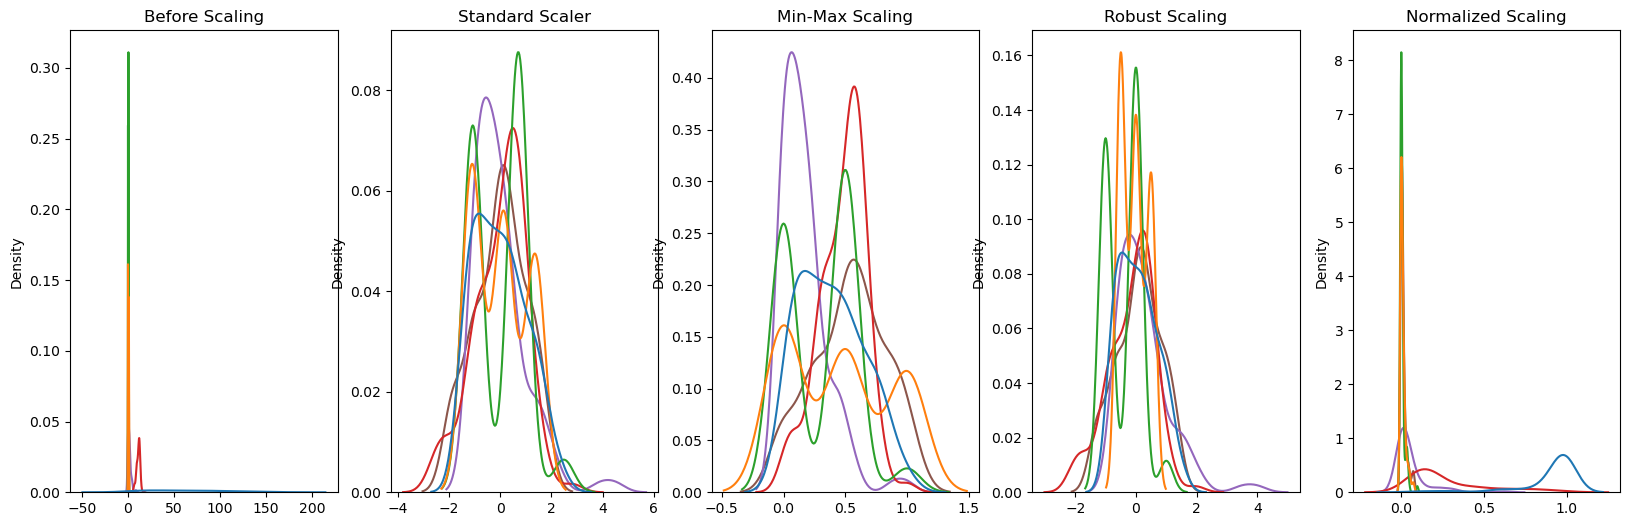

In [88]:
# Visualization of various scaling techniques on entire dataset

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, figsize=(20, 6))

ax1.set_title('Before Scaling')
sns.kdeplot(data=data[features], ax=ax1)
ax1.get_legend().set_visible(False)

ax2.set_title('Standard Scaler')
sns.kdeplot(data=stnd_data, ax=ax2)
ax2.get_legend().set_visible(False)

ax3.set_title('Min-Max Scaling')
sns.kdeplot(data=minmax_data, ax=ax3)
ax3.get_legend().set_visible(False)

ax4.set_title('Robust Scaling')
sns.kdeplot(data=robust_data, ax=ax4)
ax4.get_legend().set_visible(False)

ax5.set_title('Normalized Scaling')
sns.kdeplot(data=norm_data, ax=ax5)
ax5.get_legend().set_visible(False)

plt.show()
# fig.savefig('../plots/ScalingPlots.png')

In [89]:
# Examine the correlation of chosen scaled features with the original target

data_scaled_corr = minmax_data.corrwith(data['Popularity'], axis=0, drop=False, method='pearson', numeric_only=False)
data_scaled_corr

# Using the list below to select the best features to include in the model

Popularity              -0.152776
Size                     0.015004
Price Bracket           -0.123916
Lifespan                -0.042275
Genetic Ailments         0.003554
Intelligence Category   -0.058773
dtype: float64

<Axes: xlabel='None', ylabel='None'>

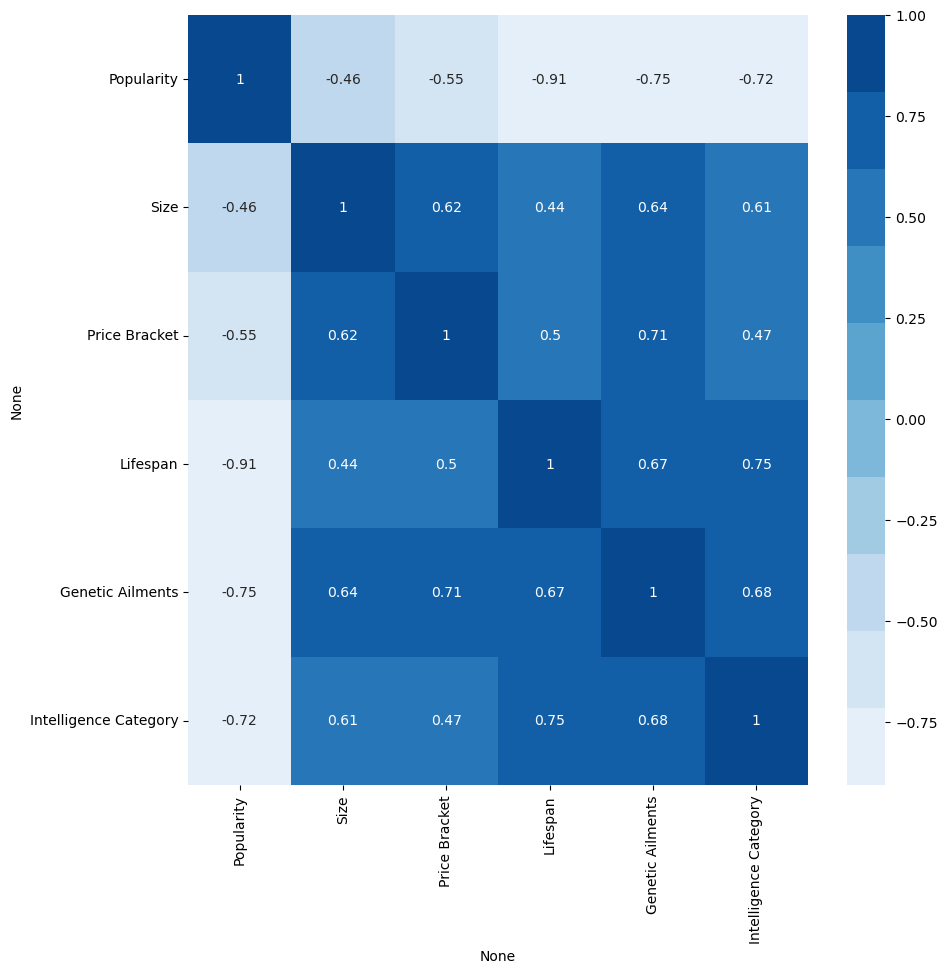

In [90]:
correlation = norm_data.corr(numeric_only=True)
colormap = sns.color_palette("Blues",10)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, cmap=colormap, robust=True, annot=True)
# plt.savefig('../plots/normalized_heatmap.png')

In [91]:
# g = sns.PairGrid(data)
# g.map_upper(sns.histplot)
# g.map_lower(sns.kdeplot, fill=True)
# g.map_diag(sns.histplot, kde=True)

## MODELING:

### Setup

In [92]:
# Assiging the features chosen above to X_features to propagate through the following models

X_features = features


#### CHOOSING WHICH SCALED DATA TO USE

In [93]:
# Define X,y with chosen scaled data

model_data = norm_data


X = model_data[X_features].drop(columns=['Popularity'])
# y = model_data['Popularity'].squeeze()
y = data['Popularity']

C:\Users\dan\AppData\Local\Temp\ipykernel_47604\861182779.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = model_data[X_features].drop(columns=['Popularity'])


In [94]:
X.info

<bound method DataFrame.info of          Size Price Bracket  Lifespan Genetic Ailments Intelligence Category
0    0.000000      0.000000  0.081881         0.000000              0.004661
1    0.011260      0.005630  0.134218         0.000000              0.000000
2    0.008897      0.008897  0.203750         0.017795              0.011567
3    0.020785      0.010393  0.211176         0.020785              0.010393
4    0.016943      0.008472  0.180786         0.033887              0.008472
..        ...           ...       ...              ...                   ...
98   0.000000      0.000000  0.342328         0.080233              0.013372
99   0.008556      0.008556  0.220221         0.000000              0.008556
100  0.000000      0.000000  0.130571         0.000000              0.004957
101  0.005410      0.005410  0.095213         0.000000              0.005410
102  0.000000      0.035317  0.889993         0.282537              0.045912

[103 rows x 5 columns]>

In [95]:
y.info

<bound method Series.info of 0      139
1       88
2       55
3       47
4       58
      ... 
166     35
167     57
168    100
169     92
171      5
Name: Popularity, Length: 103, dtype: int64>

### Train Test Split

In [96]:
# Train Test Split & confirm shapes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Shapes look correct

((72, 5), (31, 5), (72,), (31,))

### PCA

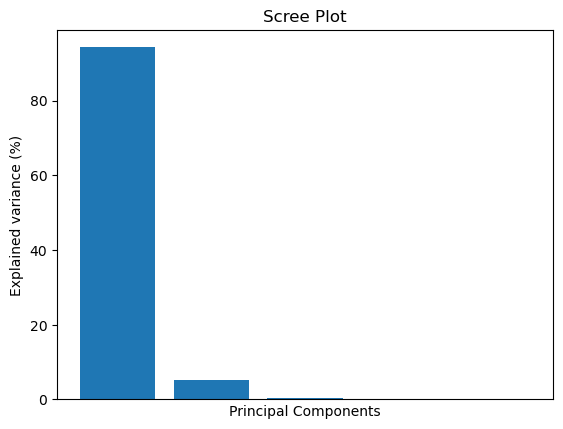

In [97]:
# PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

#plot scree plot
plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(axis='x', which = 'both', bottom=False, top=False, labelbottom=False)
plt.ylabel("Explained variance (%)")
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

## MODELS:

### (1) Linear Regression - multi feature (X_features)

In [98]:
# Linear Regression Model

lr = LinearRegression().fit(X_train, y_train)


In [99]:
# MODEL METRICS

# Predictions
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

# Calculate MSES
train_mses = []
test_mses = []   
train_mses.append(mean_squared_error(y_train, train_pred))
test_mses.append(mean_squared_error(y_test, test_pred))

#Calculate other metrics
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_train, train_pred)
score = lr.score(X_train, y_train)
intercept = lr.intercept_
coef = lr.coef_

# Print Metrics for Review
print('Model Metrics:', '\n')
print('Train MSE =', train_mses, '    Test MSE =', test_mses, '     MAE =', mae)
print("RMSE =", rmse, '     RMSLE =', rmsle)
print('Accuracy Score =', score, '      R2 Score =', r2, '\n') 
print('intercept  = ', intercept, '\n')
print('coefficients: \n ', coef)

# print(classification_report(X_test[X_features], y_test))

# confusion_matrix = confusion_matrix(X_test[X_features], y_pred)
# print(confusion_matrix)


Model Metrics: 

Train MSE = [522.1756391823833]     Test MSE = [885.9102039672657]      MAE = 25.025996824202032
RMSE = 29.764243715694604      RMSLE = 3.3933077977723753
Accuracy Score = 0.6918272619768583       R2 Score = 0.6918272619768583 

intercept  =  110.91661695304808 

coefficients: 
  [-903.15222488  298.8213508  -175.72325938  -72.03393955  897.44658144]


### Results from trying each of the different scaled versions of the data:|
#### X scaled, y not scaled - norm:
        Accuracy Score = 0.6918272619768583       
        R2 Score = 0.6918272619768583 
#### X,y - scaled - stnd:
        Accuracy Score = 0.25674706367738065       
        R2 Score = 0.25674706367738065 
#### X,y - scaled - minmax:
        Accuracy Score = 0.25674706367738065      
        R2 Score = 0.25674706367738065
#### X,y - scaled - robust:
        Accuracy Score = 0.25674706367738076       
        R2 Score = 0.25674706367738076
#### X,y - scaled - norm:
        Accuracy Score = 0.8522976547707313       
        R2 Score = 0.8522976547707313
### BEST = scaling both X and y by normalization method

### Plotting LR results on train and test

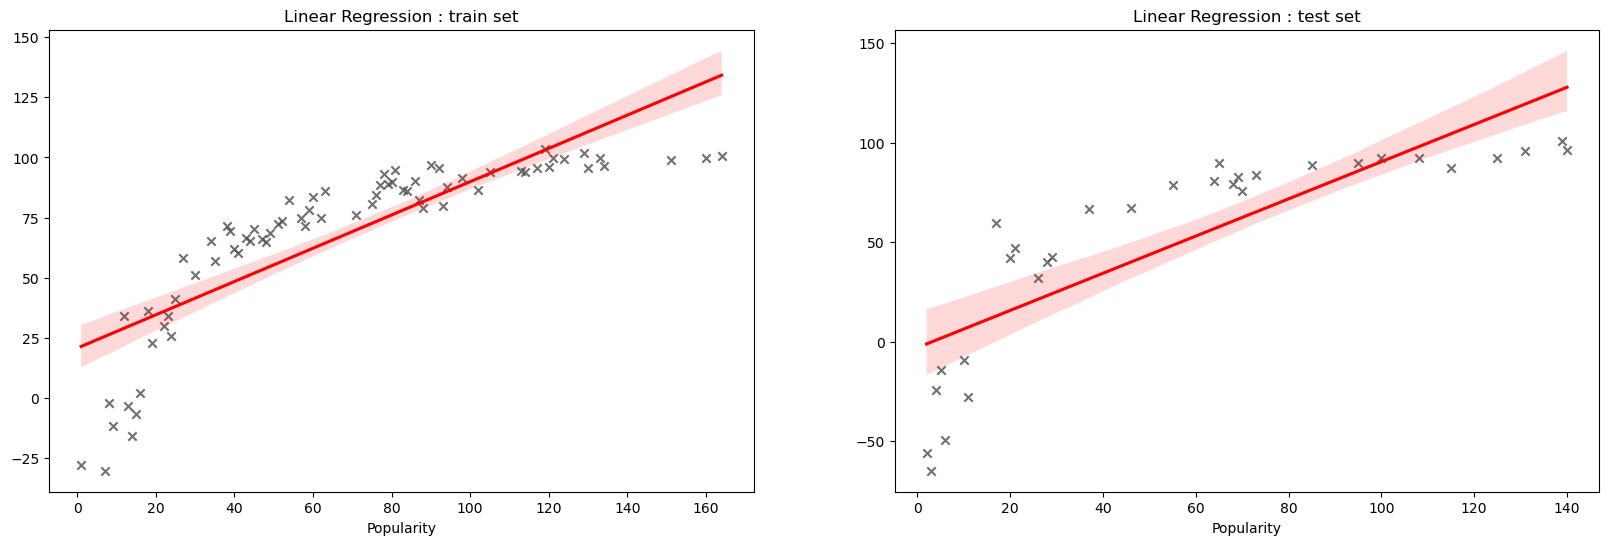

In [100]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

ax1.set_title('Linear Regression : train set')
sns.regplot(x=y_train, y=train_pred, ci=85, marker="x", color=".3", line_kws=dict(color="r"), order=1, ax=ax1)

ax2.set_title('Linear Regression : test set')
sns.regplot(x=y_test, y=test_pred, ci=85, marker="x", color=".3", line_kws=dict(color="r"), order=1, ax=ax2)

plt.show()
# fig.savefig('../plots/LinearRegression_scaledY')

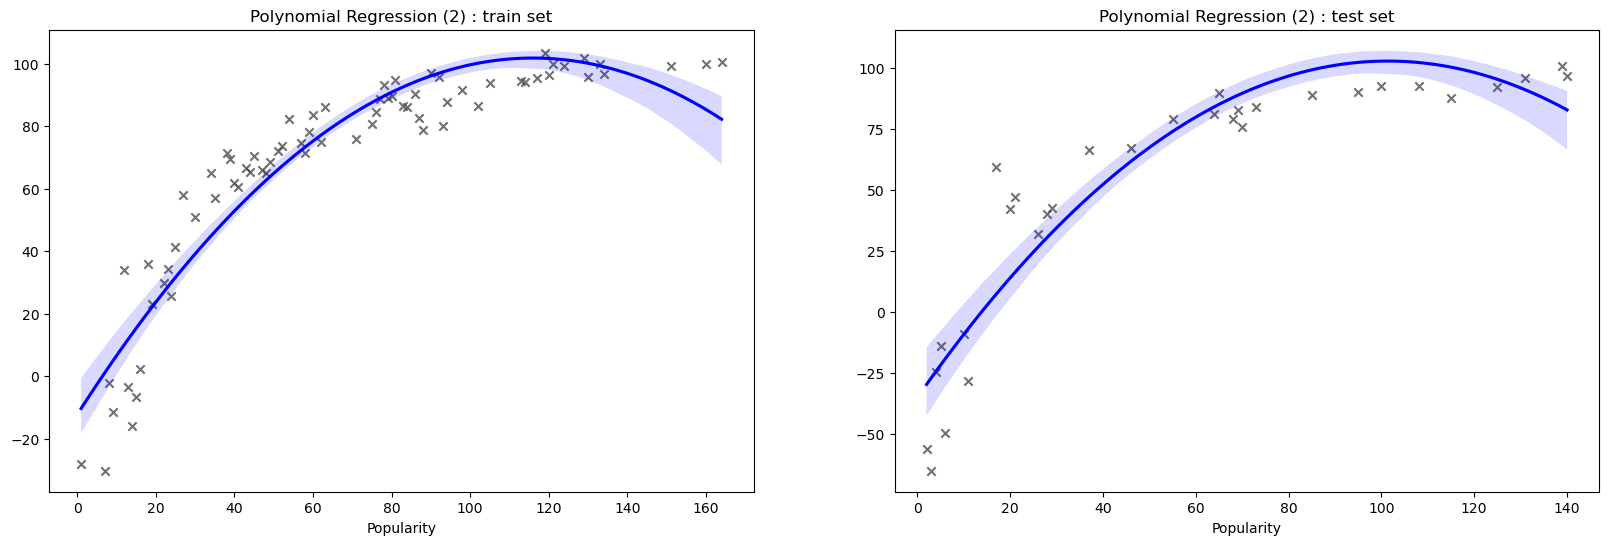

In [101]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

ax1.set_title('Polynomial Regression (2) : train set')
sns.regplot(x=y_train, y=train_pred, ci=85, marker="x", color=".3", line_kws=dict(color="b"), order=2, ax=ax1)

ax2.set_title('Polynomial Regression (2) : test set')
sns.regplot(x=y_test, y=test_pred, ci=85, marker="x", color=".3", line_kws=dict(color="b"), order=2, ax=ax2)

plt.show()
# fig.savefig('../plots/polyreg2_scaledY.png')

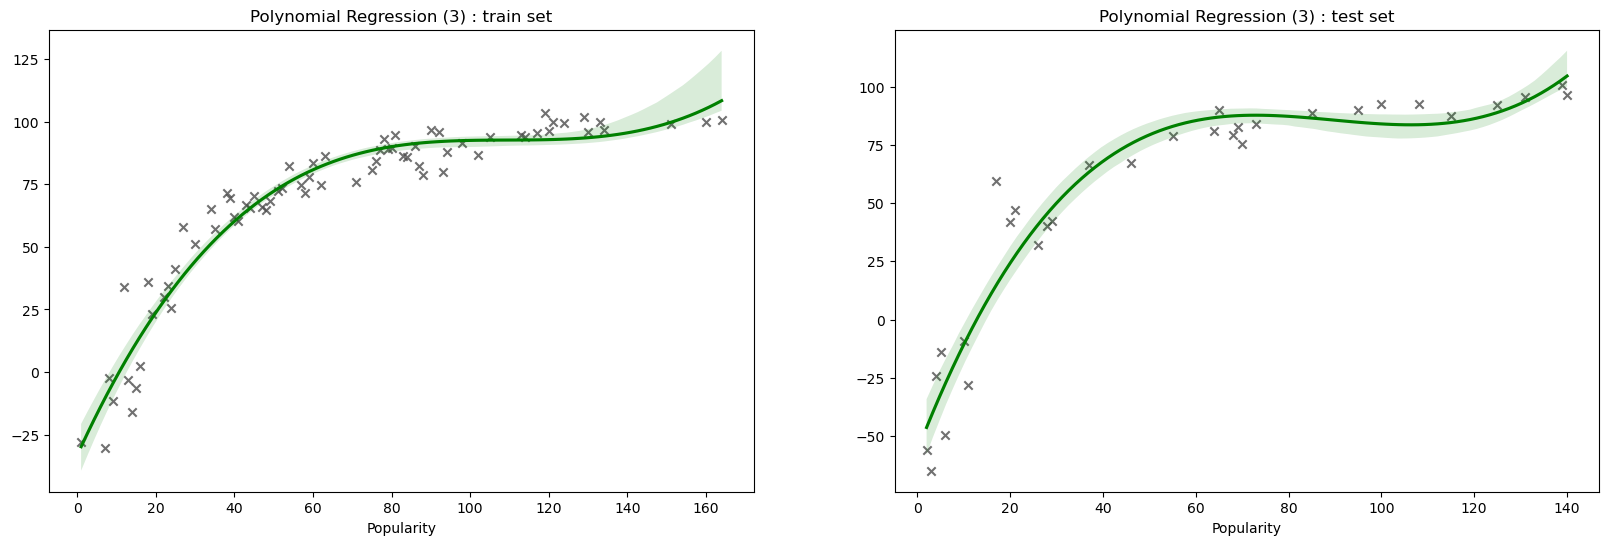

In [102]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

ax1.set_title('Polynomial Regression (3) : train set')
sns.regplot(x=y_train, y=train_pred, ci=85, marker="x", color=".3", line_kws=dict(color="g"), order=3, ax=ax1)

ax2.set_title('Polynomial Regression (3) : test set')
sns.regplot(x=y_test, y=test_pred, ci=85, marker="x", color=".3", line_kws=dict(color="g"), order=3, ax=ax2)

plt.show()
# fig.savefig('../plots/polyreg3_scaledY.png')

### Polynomial Regression (2)

In [103]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2_train = poly_features.fit_transform(X_train)
X_poly_2_test = poly_features.fit_transform(X_test)

lr_poly2 = LinearRegression().fit(X_poly_2_train, y_train)


In [104]:
# MODEL METRICS

# Predictions
poly2_train_pred = lr_poly2.predict(X_poly_2_train)
poly2_test_pred = lr_poly2.predict(X_poly_2_test)

# Calculate MSES
train_mses = []
test_mses = []   
train_mses.append(mean_squared_error(y_train, poly2_train_pred))
test_mses.append(mean_squared_error(y_test, poly2_test_pred))

#Calculate other metrics
mae = mean_absolute_error(y_test, poly2_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, poly2_test_pred))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, poly2_test_pred)))
r2 = r2_score(y_train, poly2_train_pred)
score = lr_poly2.score(X_poly_2_train, y_train)
intercept = lr_poly2.intercept_
coef = lr_poly2.coef_

# Print Metrics for Review
print('Model Metrics:', '\n')
print('Train MSE =', train_mses, '    Test MSE =', test_mses, '     MAE =', mae)
print("RMSE =", rmse, '     RMSLE =', rmsle)
print('Accuracy Score =', score, '      R2 Score =', r2, '\n') 
# print('intercept  = ', intercept, '\n')
# print('coefficients: \n ', coef)


Model Metrics: 

Train MSE = [147.5631553107116]     Test MSE = [1583.7683051895647]      MAE = 22.629616580384212
RMSE = 39.79658660223971      RMSLE = 3.683781144849649
Accuracy Score = 0.9129125562528343       R2 Score = 0.9129125562528343 



### Polynomial Regression (3)

In [105]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_2_train = poly_features.fit_transform(X_train)
X_poly_2_test = poly_features.fit_transform(X_test)

lr_poly2 = LinearRegression().fit(X_poly_2_train, y_train)


In [106]:
# MODEL METRICS

# Predictions
poly2_train_pred = lr_poly2.predict(X_poly_2_train)
poly2_test_pred = lr_poly2.predict(X_poly_2_test)

# Calculate MSES
train_mses = []
test_mses = []   
train_mses.append(mean_squared_error(y_train, poly2_train_pred))
test_mses.append(mean_squared_error(y_test, poly2_test_pred))

#Calculate other metrics
mae = mean_absolute_error(y_test, poly2_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, poly2_test_pred))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, poly2_test_pred)))
r2 = r2_score(y_train, poly2_train_pred)
score = lr_poly2.score(X_poly_2_train, y_train)
intercept = lr_poly2.intercept_
coef = lr_poly2.coef_

# Print Metrics for Review
print('Model Metrics:', '\n')
print('Train MSE =', train_mses, '    Test MSE =', test_mses, '     MAE =', mae)
print("RMSE =", rmse, '     RMSLE =', rmsle)
print('Accuracy Score =', score, '      R2 Score =', r2, '\n') 
# print('intercept  = ', intercept, '\n')
# print('coefficients: \n ', coef)


Model Metrics: 

Train MSE = [39.944024779029604]     Test MSE = [1197601327.5793958]      MAE = 7215.4618650908005
RMSE = 34606.37697851937      RMSLE = 10.451793249801154
Accuracy Score = 0.9764262088076493       R2 Score = 0.9764262088076493 



### Results from trying polynomial 2 and 3 on scaled and original target:|

#### X,y - Target Scaled - poly = 2:
        Accuracy Score = 0.9891865477326751
        R2 Score = 0.9891865477326751  
#### X,y - Target Scaled - poly = 3:
        Accuracy Score = 0.999999792155457
        R2 Score = 0.999999792155457
        
#### X,y - Target not Scaled - poly = 2:
        Accuracy Score = 0.9129125562528343
        R2 Score = 0.9129125562528343  
#### X,y - Target not Scaled - poly = 3:
        Accuracy Score = 0.9764262088076493
        R2 Score = 0.9764262088076493

### BEST = Target not Scaled - poly = 3 (normalization method)
        Even though the scores are better with the target scaled, the scores are still great with the original target
        but the curve with the original target looks less likely to overfit or be affected by outliers.

### (2) Logistic Regression Classification

In [107]:
# Logistic Regression Model

logreg = LogisticRegression(penalty='l2', max_iter=500, multi_class='ovr', solver='liblinear')
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=500, multi_class='ovr', solver='liblinear')

In [108]:
# MODEL METRICS

# Predictions
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)

# Calculate MSES
train_mses = []
test_mses = []   
train_mses.append(mean_squared_error(y_train, train_pred))
test_mses.append(mean_squared_error(y_test, test_pred))

#Calculate other metrics
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_train, train_pred)
score = logreg.score(X_train, y_train)
intercept = logreg.intercept_
coef = logreg.coef_

# Print Metrics for Review
print('Model Metrics:', '\n')
print('Train MSE =', train_mses, '    Test MSE =', test_mses, '     MAE =', mae)
print("RMSE =", rmse, '     RMSLE =', rmsle)
print('Score =', score, '      R2 Score =', r2, '\n') 
# print('intercept  = ', intercept, '\n')
# print('coefficients: \n ', coef)

Model Metrics: 

Train MSE = [2665.3611111111113]     Test MSE = [2368.1290322580644]      MAE = 38.70967741935484
RMSE = 48.66342602261029      RMSLE = 3.884927742246608
Score = 0.027777777777777776       R2 Score = -0.5730179077630664 



#### LogReg Result: No good model
    Score = 0.027777777777777776       R2 Score = -0.5730179077630664


### (3) Decision Tree

In [109]:
# Define X,y with chosen scaled data

model_data = data


X = model_data[X_features].drop(columns=['Popularity'])
y = data['Popularity']

In [110]:
# Train Test Split & confirm shapes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Shapes look correct

((72, 5), (31, 5), (72,), (31,))

In [111]:
# Decision Tree Model

dt_model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)


In [112]:
# tree_text = tree.export_text(dt_model)
# print(tree_text)

In [113]:
# fig = plt.figure(figsize=(25,40))
# _ = tree.plot_tree(dt_model,
#                    filled=True)

In [114]:
# MODEL METRICS

# Predictions
train_pred = dt_model.predict(X_train)
test_pred = dt_model.predict(X_test)

# Calculate MSES
train_mses = []
test_mses = []   
train_mses.append(mean_squared_error(y_train, train_pred))
test_mses.append(mean_squared_error(y_test, test_pred))

#Calculate other metrics
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_train, train_pred)
score = dt_model.score(X_train, y_train)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Print Metrics for Review
print('Model Metrics:', '\n')
print('Train MSE =', train_mses, '    Test MSE =', test_mses, '     MAE =', mae)
print("RMSE =", rmse, '     RMSLE =', rmsle)
print('Score =', score, '      R2 Score =', r2, '\n') 

# print('Train Accuracy Score =', train_accuracy, '   Test Accuracy Score =', test_accuracy)



Model Metrics: 

Train MSE = [0.0]     Test MSE = [3092.2258064516127]      MAE = 45.903225806451616
RMSE = 55.60778548415332      RMSLE = 4.01832321814712
Score = 1.0       R2 Score = 1.0 



In [115]:
# print('Train Confusion Matrix:')
# confusion_matrix(y_train, train_pred)


In [116]:
# cm = confusion_matrix(y_train, train_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot();

In [117]:
# print('Test Confusion Matrix:')
# confusion_matrix(y_test, test_pred)

In [118]:
# cm = confusion_matrix(y_test, test_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot();

In [119]:
# print ('Train Classification Report \n', classification_report(y_train, train_pred))

In [120]:
# print ('Test Classification Report \n', classification_report(y_test, test_pred))

#### DT Result: No good model
    Score = 1.0       R2 Score = 1.0


### (4)Random Forest

In [121]:
# Random Forest Model

rf_model = RandomForestClassifier(max_depth=8, random_state=0).fit(X_train, y_train)


In [122]:
# MODEL METRICS

# Predictions
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

# Calculate MSES
train_mses = []
test_mses = []   
train_mses.append(mean_squared_error(y_train, train_pred))
test_mses.append(mean_squared_error(y_test, test_pred))

#Calculate other metrics
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_train, train_pred)
score = rf_model.score(X_train, y_train)

# Print Metrics for Review
print('Model Metrics:', '\n')
print('Train MSE =', train_mses, '    Test MSE =', test_mses, '     MAE =', mae)
print("RMSE =", rmse, '     RMSLE =', rmsle)
print('Score =', score, '      R2 Score =', r2, '\n') 


Model Metrics: 

Train MSE = [0.0]     Test MSE = [3220.4193548387098]      MAE = 44.225806451612904
RMSE = 56.7487387951372      RMSLE = 4.0386334322403235
Score = 1.0       R2 Score = 1.0 



#### RF Result: No good model
    Score = 1.0       R2 Score = 1.0


### (5) Naive Bayes / Bernoulli & Gaussian

In [123]:
# Naive Bayes Model

NB_model = GaussianNB().fit(X_train, y_train)


In [124]:
# MODEL METRICS

# Predictions
train_pred = NB_model.predict(X_train)
test_pred = NB_model.predict(X_test)

# Calculate MSES
train_mses = []
test_mses = []   
train_mses.append(mean_squared_error(y_train, train_pred))
test_mses.append(mean_squared_error(y_test, test_pred))

#Calculate other metrics
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_train, train_pred)
score = NB_model.score(X_train, y_train)

# Print Metrics for Review
print('Model Metrics:', '\n')
print('Train MSE =', train_mses, '    Test MSE =', test_mses, '     MAE =', mae)
print("RMSE =", rmse, '     RMSLE =', rmsle)
print('Score =', score, '      R2 Score =', r2, '\n') 


Model Metrics: 

Train MSE = [0.0]     Test MSE = [2036.6129032258063]      MAE = 34.483870967741936
RMSE = 45.1288477941306      RMSLE = 3.809521682693817
Score = 1.0       R2 Score = 1.0 



In [125]:
# from sklearn.metrics import (
#     accuracy_score,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
#     f1_score,
# )

# y_pred = NB_model.predict(X_test)
# accuray = accuracy_score(y_pred, y_test)
# f1 = f1_score(y_pred, y_test, average="weighted")

# print("Accuracy:", accuray)
# print("F1 Score:", f1)
# y_pred

In [126]:
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot();

#### NB Result: No good model
    Score = 1.0       R2 Score = 1.0


### (6) Gaussian Mixture (GMM)

In [127]:
# Gaussian Mixture Model

GMM_model = GaussianMixture(n_components=4, random_state=1,max_iter=100).fit(X_train, y_train)


C:\Users\dan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [128]:
# MODEL METRICS

# Predictions
train_pred = GMM_model.predict(X_train)
test_pred = GMM_model.predict(X_test)

# Calculate MSES
train_mses = []
test_mses = []   
train_mses.append(mean_squared_error(y_train, train_pred))
test_mses.append(mean_squared_error(y_test, test_pred))

#Calculate other metrics
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_train, train_pred)
score = GMM_model.score(X_train, y_train)

# Print Metrics for Review
print('Model Metrics:', '\n')
print('Train MSE =', train_mses, '    Test MSE =', test_mses, '     MAE =', mae)
print("RMSE =", rmse, '     RMSLE =', rmsle)
print('Score =', score, '      R2 Score =', r2, '\n') 


Model Metrics: 

Train MSE = [6151.833333333333]     Test MSE = [5121.580645161291]      MAE = 56.41935483870968
RMSE = 71.56521952150563      RMSLE = 4.27060919507374
Score = -2.864073026233552       R2 Score = -2.630631496260203 



#### GMM Result: No good model
    Score = 14.518594004166257       R2 Score = -2.5973442320609292


### (7) K-nearest Neighbors (KNN)

In [129]:
# Define X,y with chosen scaled data

model_data = norm_data


X = model_data[X_features].drop(columns=['Popularity'])
y = data['Popularity']

C:\Users\dan\AppData\Local\Temp\ipykernel_47604\4134003617.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = model_data[X_features].drop(columns=['Popularity'])


In [130]:
# Train Test Split & confirm shapes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Shapes look correct

((72, 5), (31, 5), (72,), (31,))

In [131]:
# KNN Model (n_neighbors=3)

KNN2_model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)


In [132]:
# KNN Model (n_neighbors=6)

KNN3_model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)


In [133]:
# MODEL METRICS

# Predictions

KNN2_train_pred = KNN2_model.predict(X_train)
KNN2_test_pred = KNN2_model.predict(X_test)

KNN3_train_pred = KNN3_model.predict(X_train)
KNN3_test_pred = KNN3_model.predict(X_test)

# Calculate MSES
KNN2_train_mses = []
KNN2_test_mses = []
KNN2_train_mses.append(mean_squared_error(y_train, KNN2_train_pred))
KNN2_test_mses.append(mean_squared_error(y_test, KNN2_test_pred))

KNN3_train_mses = []
KNN3_test_mses = []
KNN3_train_mses.append(mean_squared_error(y_train, KNN3_train_pred))
KNN3_test_mses.append(mean_squared_error(y_test, KNN3_test_pred))

#Calculate other metrics
KNN2_mae = mean_absolute_error(y_test, KNN2_test_pred)
KNN2_rmse = np.sqrt(mean_squared_error(y_test, KNN2_test_pred))
KNN2_rmsle = np.log(np.sqrt(mean_squared_error(y_test, KNN2_test_pred)))
KNN2_r2 = r2_score(y_train, KNN2_train_pred)
KNN2_score = KNN2_model.score(X_train, y_train)

KNN3_mae = mean_absolute_error(y_test, KNN3_test_pred)
KNN3_rmse = np.sqrt(mean_squared_error(y_test, KNN3_test_pred))
KNN3_rmsle = np.log(np.sqrt(mean_squared_error(y_test, KNN3_test_pred)))
KNN3_r2 = r2_score(y_train, KNN3_train_pred)
KNN3_score = KNN3_model.score(X_train, y_train)

# Print Metrics for Review
print('Model Metrics:', '\n')
print('KNN Model 2 Neighbors:', '\n')
print('KNN 2 Train MSE =', KNN2_train_mses, '    KNN 2 Test MSE =', KNN2_test_mses, '     KNN 2 MAE =', KNN2_mae)
print("KNN 2 RMSE =", KNN2_rmse, '     KNN 2 RMSLE =', KNN2_rmsle)
print('KNN 2 Score =', KNN2_score, '      KNN 2 R2 Score =', KNN2_r2, '\n') 
print('KNN Model 3 Neighbors:', '\n')
print('KNN 3 Train MSE =', KNN3_train_mses, '    KNN 3 Test MSE =', KNN3_test_mses, '     KNN 3 MAE =', KNN3_mae)
print("KNN 3 RMSE =", KNN3_rmse, '     KNN 3 RMSLE =', KNN3_rmsle)
print('KNN 3 Score =', KNN3_score, '      KNN 3 R2 Score =', KNN3_r2, '\n') 



Model Metrics: 

KNN Model 2 Neighbors: 

KNN 2 Train MSE = [120.48611111111111]     KNN 2 Test MSE = [171.06451612903226]      KNN 2 MAE = 9.451612903225806
KNN 2 RMSE = 13.079163433837511      KNN 2 RMSLE = 2.571020386325992
KNN 2 Score = 0.4166666666666667       KNN 2 R2 Score = 0.9288926331128542 

KNN Model 3 Neighbors: 

KNN 3 Train MSE = [196.33333333333334]     KNN 3 Test MSE = [176.83870967741936]      KNN 3 MAE = 9.483870967741936
KNN 3 RMSE = 13.29807165259006      KNN 3 RMSLE = 2.5876190361887925
KNN 3 Score = 0.3194444444444444       KNN 3 R2 Score = 0.8841298284361161 



#### KNN Result: Best Model = KNN 2
    KNN 2 Score = 0.4166666666666667       KNN 2 R2 Score = 0.9288926331128542 

### (8) Support Vector Machine (SVM)

In [134]:
# Define X,y with chosen scaled data

model_data = data


X = model_data[X_features].drop(columns=['Popularity'])
y = data['Popularity']

In [135]:
# Train Test Split & confirm shapes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Shapes look correct

((72, 5), (31, 5), (72,), (31,))

In [136]:
# SVM Model

SVM_model = LinearSVC(max_iter=3000, random_state=42, C=.5).fit(X_train, y_train)


C:\Users\dan\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\dan\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [137]:
# MODEL METRICS

# Predictions
train_pred = SVM_model.predict(X_train)
test_pred = SVM_model.predict(X_test)

# Calculate MSES
train_mses = []
test_mses = []   
train_mses.append(mean_squared_error(y_train, train_pred))
test_mses.append(mean_squared_error(y_test, test_pred))

#Calculate other metrics
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_train, train_pred)
score = SVM_model.score(X_train, y_train)
intercept = SVM_model.intercept_
coef = SVM_model.coef_

# Print Metrics for Review
print('Model Metrics:', '\n')
print('Train MSE =', train_mses, '    Test MSE =', test_mses, '     MAE =', mae, '\n')
print("RMSE =", rmse, '     RMSLE =', rmsle)
print('Score =', score, '      R2 Score =', r2, '\n') 
# print('intercept  = ', intercept, '\n')
# print('coefficients: \n ', coef)


Model Metrics: 

Train MSE = [650.8055555555555]     Test MSE = [2429.0]      MAE = 38.54838709677419 

RMSE = 49.28488612140643      RMSLE = 3.8976174645010864
Score = 0.6944444444444444       R2 Score = 0.6159136602192649 



#### SVM Result:  Best Model:
    Score = 0.6944444444444444       R2 Score = 0.6159136602192649  

### (9) Neural Network

In [138]:
# Define X,y with chosen scaled data

model_data = norm_data


X = model_data[X_features].drop(columns=['Popularity'])
y = data['Popularity']


C:\Users\dan\AppData\Local\Temp\ipykernel_47604\3097058878.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = model_data[X_features].drop(columns=['Popularity'])


In [139]:
# Train Test Split & confirm shapes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Shapes look correct

((72, 5), (31, 5), (72,), (31,))

In [140]:
# Neural Network Model

NN_model = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)


C:\Users\dan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [141]:
# MODEL METRICS

# Predictions
train_pred = NN_model.predict(X_train)
test_pred = NN_model.predict(X_test)

# Calculate MSES
train_mses = []
test_mses = []   
train_mses.append(mean_squared_error(y_train, train_pred))
test_mses.append(mean_squared_error(y_test, test_pred))

#Calculate other metrics
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, test_pred)))
r2 = r2_score(y_train, train_pred)
score = NN_model.score(X_train, y_train)

# Print Metrics for Review
print('Model Metrics:', '\n')
print('Train MSE =', train_mses, '    Test MSE =', test_mses, '     MAE =', mae)
print("RMSE =", rmse, '     RMSLE =', rmsle)
print('Score =', score, '      R2 Score =', r2, '\n') 


Model Metrics: 

Train MSE = [822.5833333333334]     Test MSE = [691.2258064516129]      MAE = 16.451612903225808
RMSE = 26.29117354648919      RMSLE = 3.2692332762578524
Score = 0.3055555555555556       R2 Score = 0.5145354569154932 



#### NN Best Model: Using standardization scaler on features
    Score = 0.9861111111111112       R2 Score = 0.9551142431038605
